## Prechecking


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!nvidia-smi

Mon Jun 17 05:31:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [3]:
!wget -P /kaggle/working/ -q https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8m.pt

## Data Preparation


In [3]:
%cd /kaggle/working
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3bnGDKd7LZf6w8OLQzn1")
project = rf.workspace("bao-dphco").project("traffic-sign-at-hcmc")
version = project.version(21)
dataset = version.download("yolov8")

from IPython import display
display.clear_output()

In [ ]:
!unzip roboflow.zip -d /content/drive/MyDrive/TRAIN/datasets

Archive:  roboflow.zip

replace /content/drive/MyDrive/TRAIN/datasets/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Custom Training

In [ ]:
%cd /kaggle/working/

!yolo task=detect mode=train model=/kaggle/working/yolov8m.pt data=/kaggle/working/Traffic-Sign-at-HCMC-21/data.yaml epochs=100 imgsz=640 plots=True device = 0,1 patience=0

/kaggle/working
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                       CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8m.pt, data=/kaggle/working/Traffic-Sign-at-HCMC-21/data.yaml, epochs=100, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     61/100      4.07G     0.6112     0.3704      0.964         18        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1985       2874      0.958       0.95       0.97      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/100      4.07G     0.6032     0.3618     0.9561         15        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1985       2874      0.957       0.95       0.97      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     63/100      4.07G      0.603      0.362     0.9573         11        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1985       2874      0.957       0.95      0.971      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     64/10

In [4]:
from ultralytics import YOLO
from IPython.display import Image,display


In [5]:
!ls /kaggle/working/runs/detect/train

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
confusion_matrix_normalized.png			   val_batch1_labels.jpg
events.out.tfevents.1717989086.e369fd2d1e15.121.0  val_batch1_pred.jpg
labels.jpg					   val_batch2_labels.jpg
labels_correlogram.jpg				   val_batch2_pred.jpg
results.csv					   weights


/kaggle/working


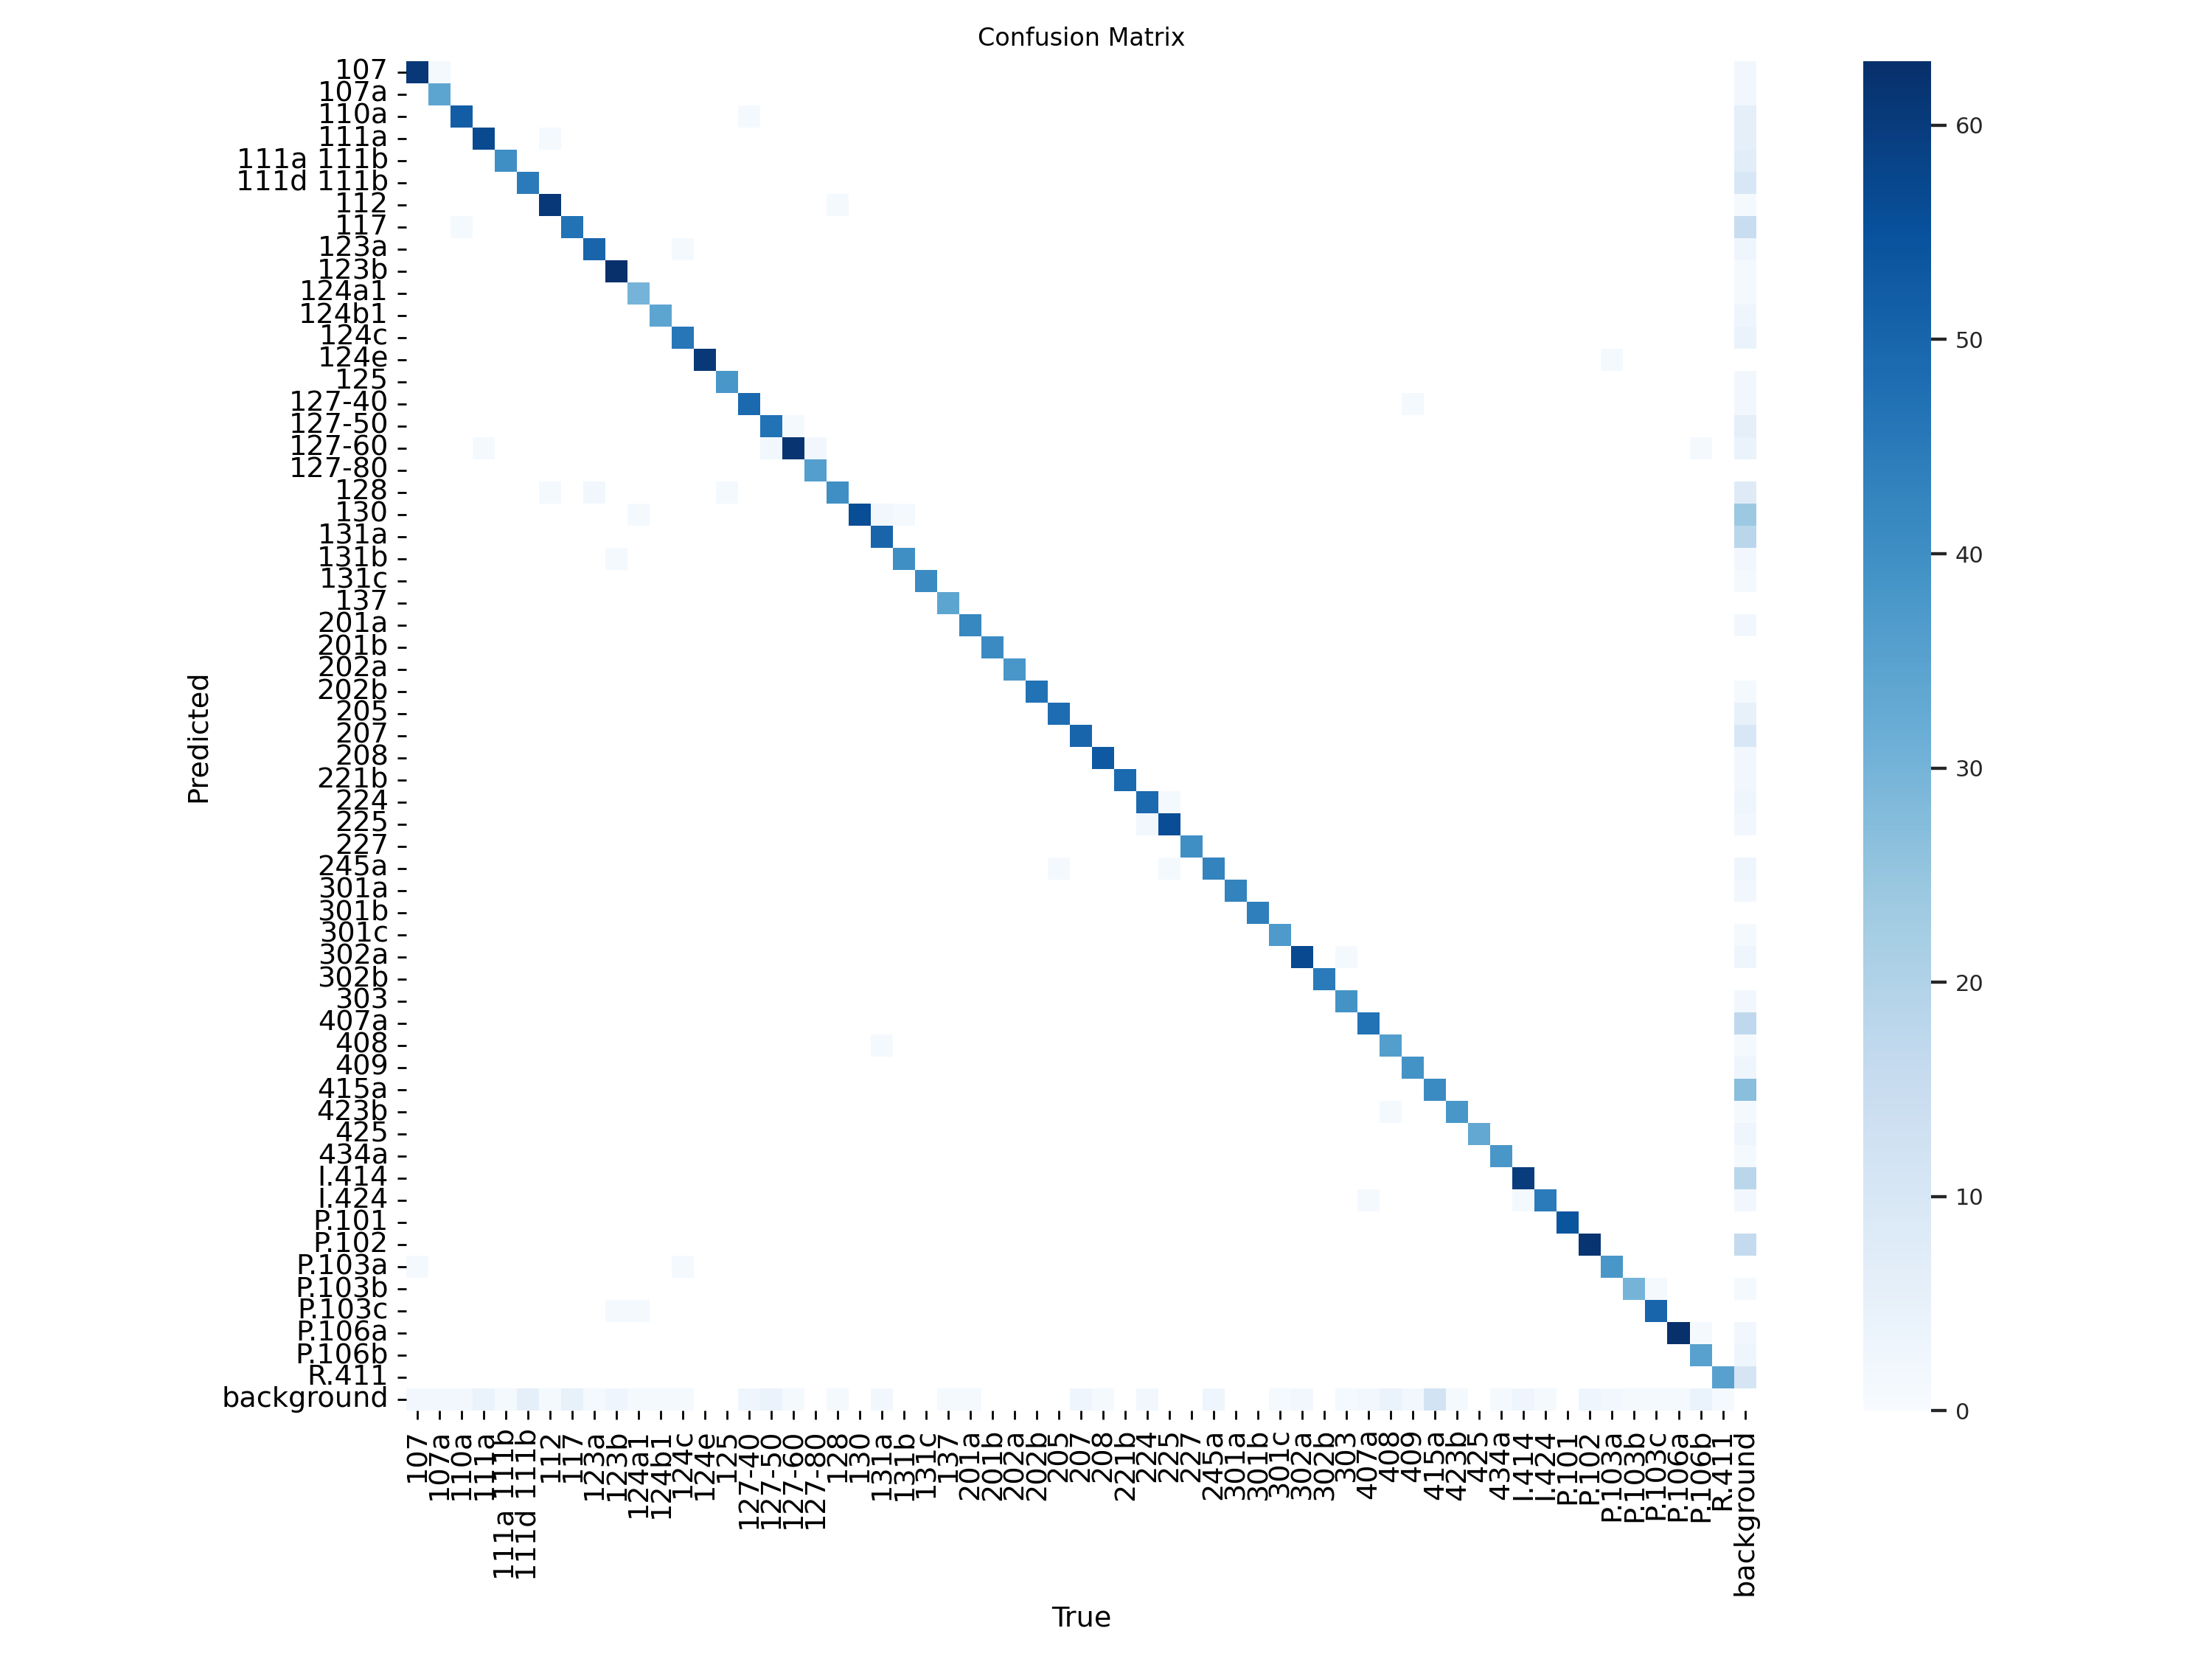

In [9]:
%cd /kaggle/working/
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


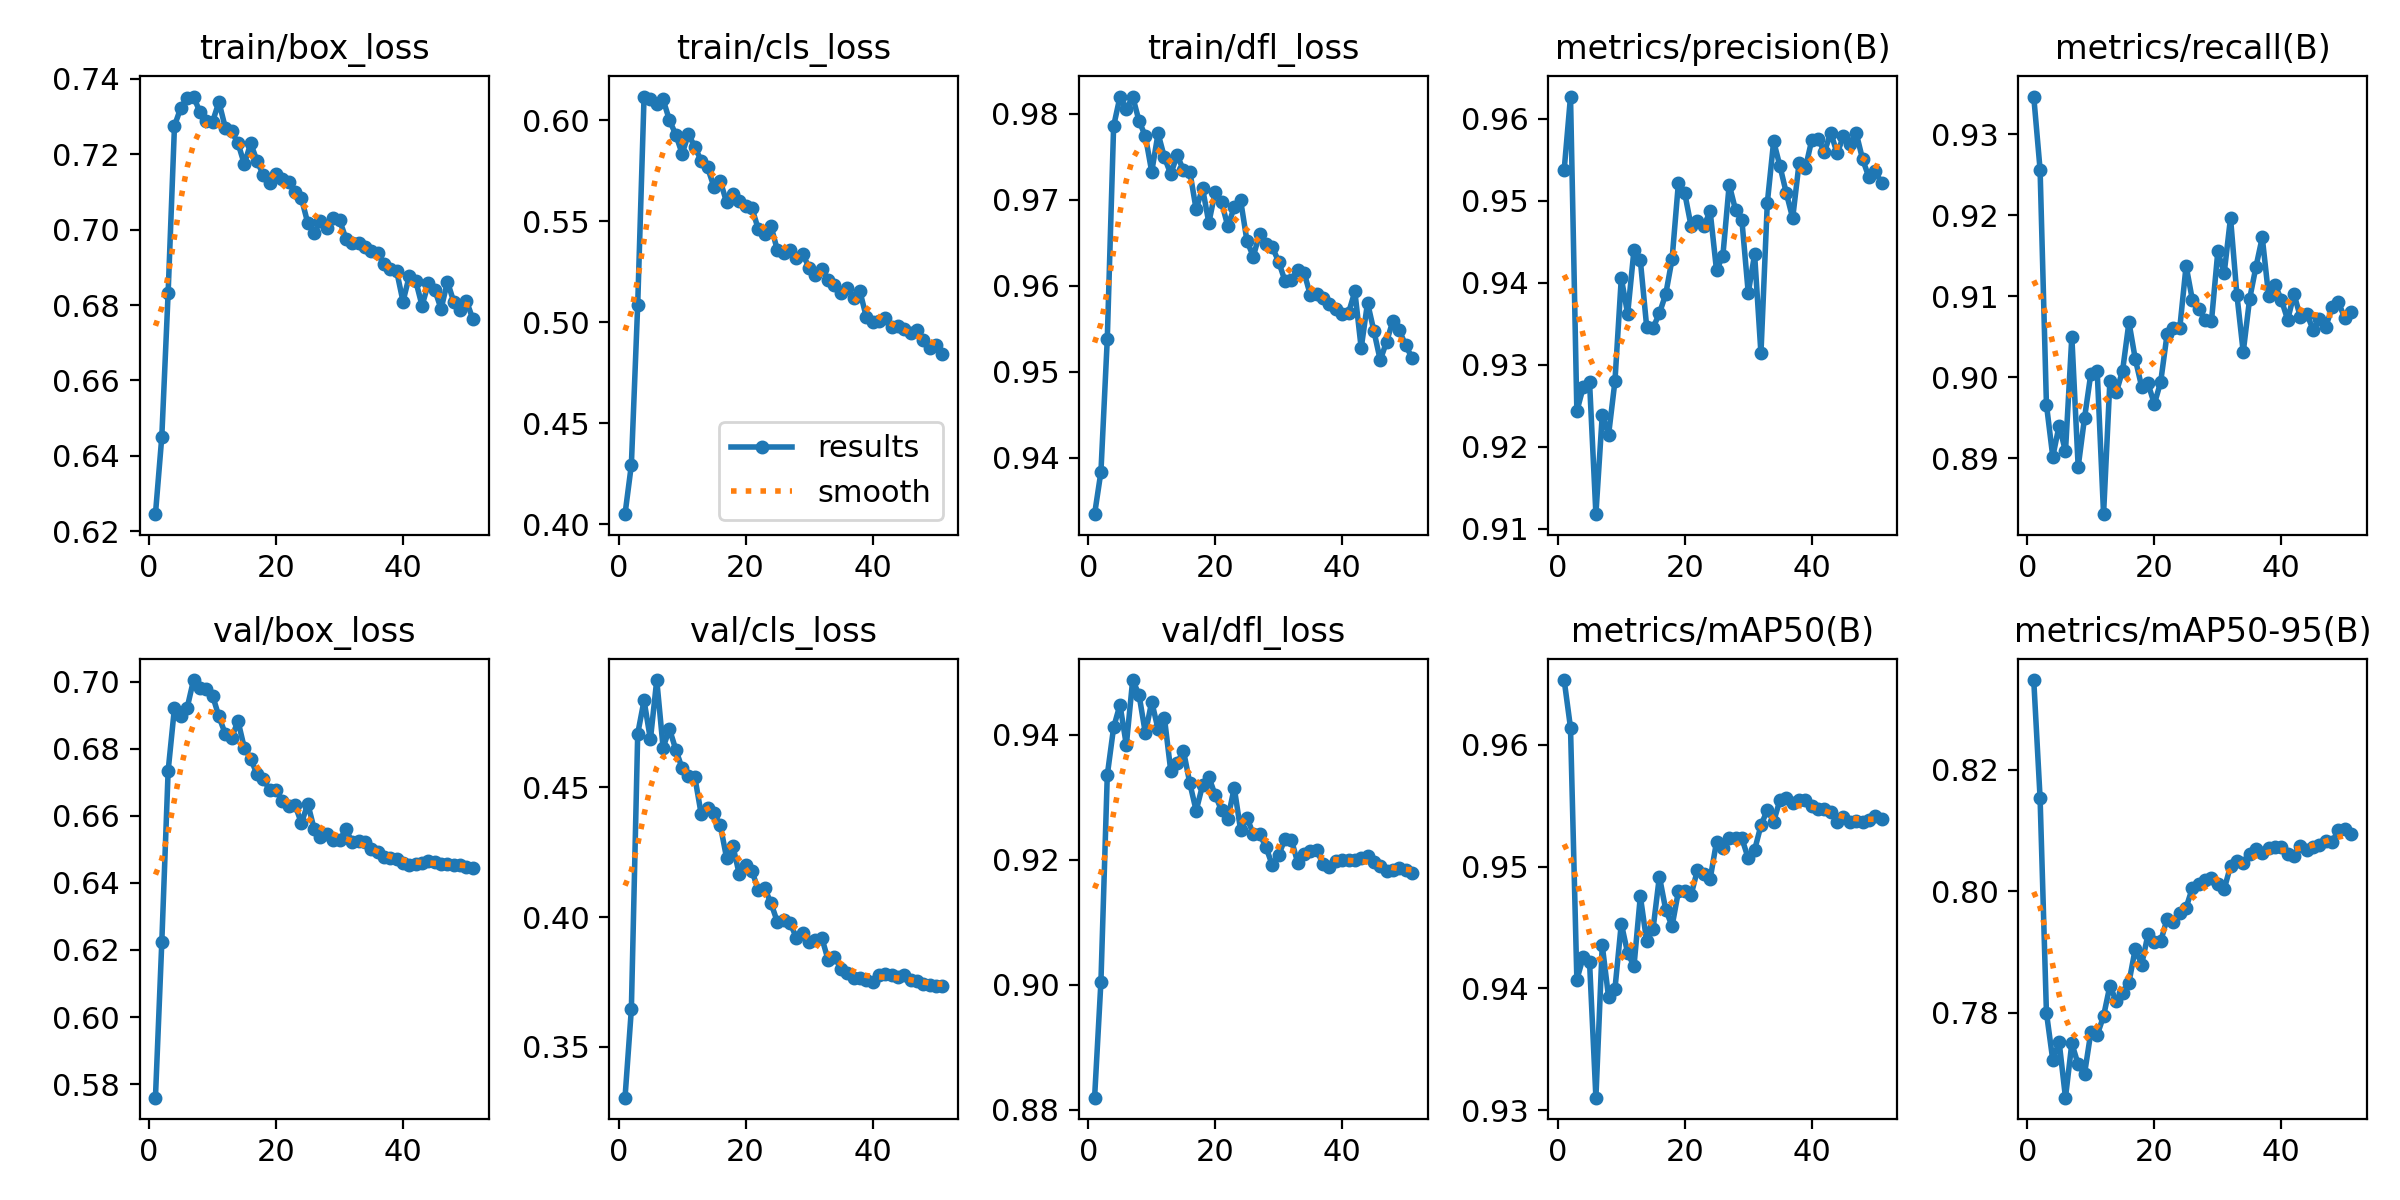

In [10]:
%cd /kaggle/working/
Image(filename='/kaggle/working/runs/detect/train/results.png', width=600)

/kaggle/working


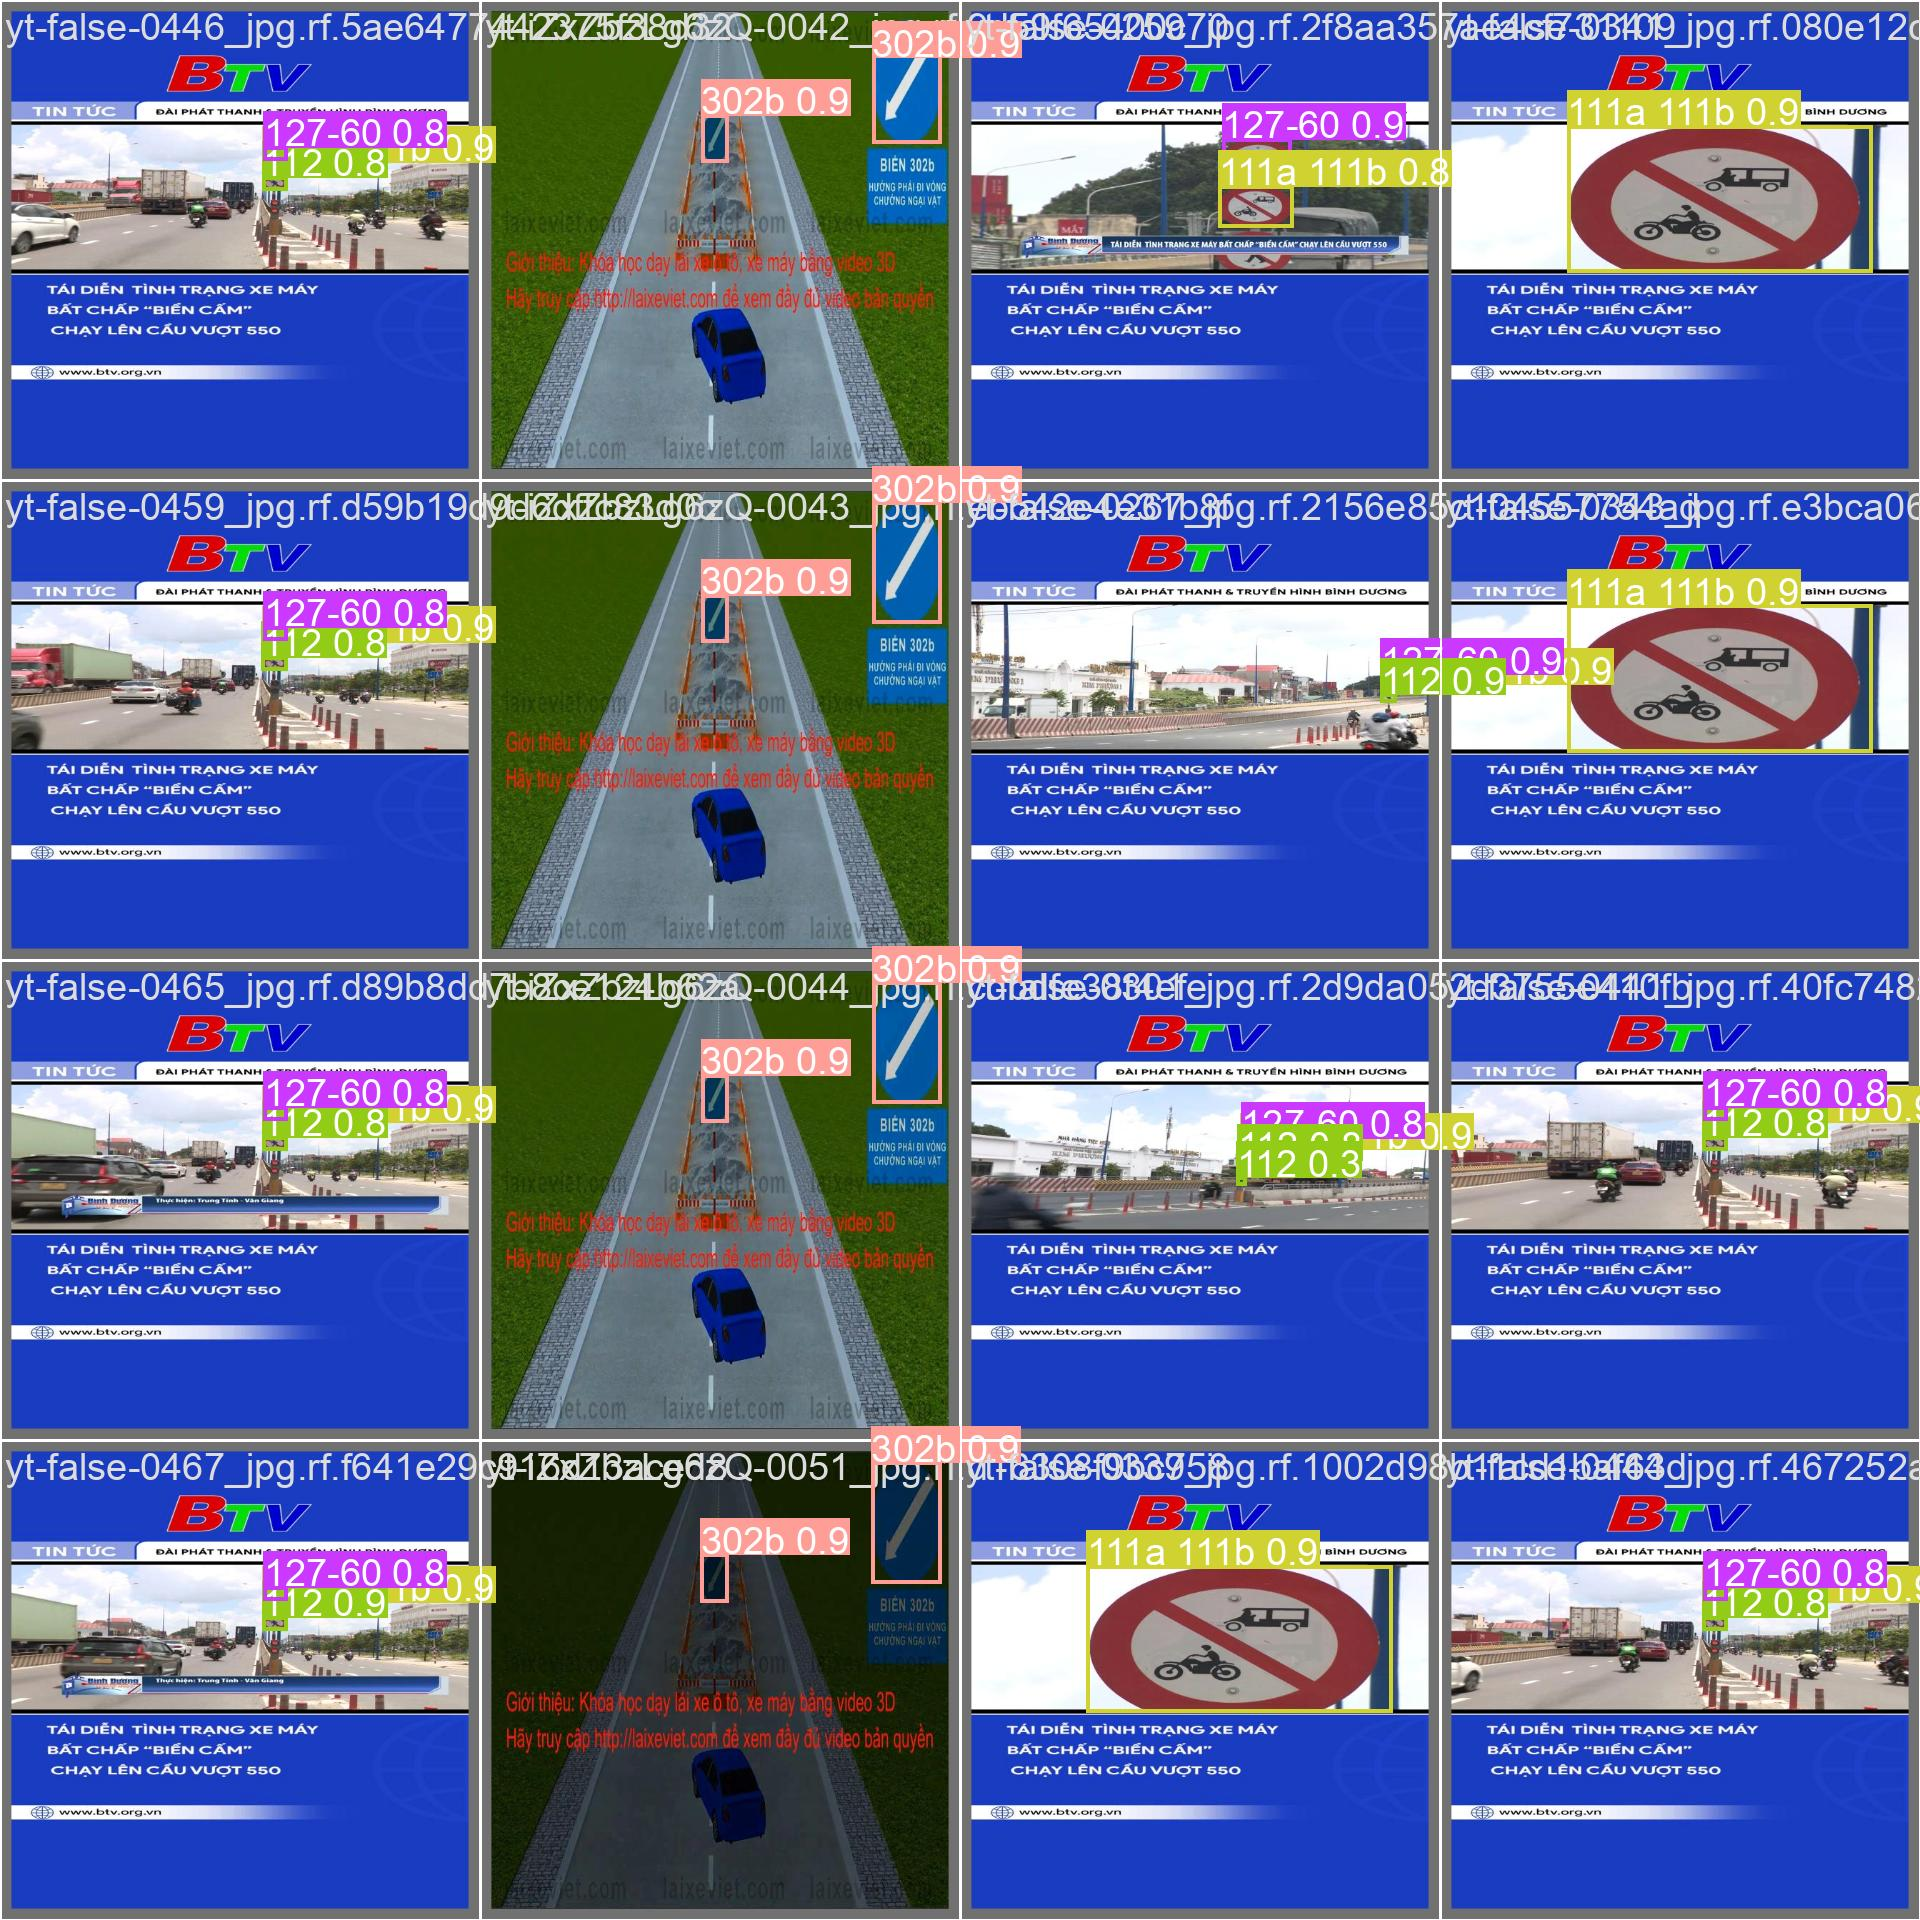

In [11]:
%cd /kaggle/working/
Image(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [5]:
%cd /kaggle/working/

!yolo task=detect mode=val model=/kaggle/input/model-100-epoch/best.pt data=/kaggle/working/Traffic-Sign-at-HCMC-21/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 23.2MB/s]
val: Scanning /kaggle/working/Traffic-Sign-at-HCMC-21/valid/labels... 1985 image
val: New cache created: /kaggle/working/Traffic-Sign-at-HCMC-21/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8, len(boxes) = 2874. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1985       2874      0.965      0.947      0.971      0.818
                   107       1985         45      0.989      0.978      0.993      0.885
                  107a       1985         39  

## Inference with Custom Model

In [6]:
%cd /kaggle/working/
!yolo task=detect mode=predict model=/kaggle/input/model-100-epoch/best.pt conf=0.25 source=/kaggle/working/Traffic-Sign-at-HCMC-21/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs

image 1/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/test/images/-2024-01-03-3-49-27_png.rf.04812bb66c29d78bd517a99882bbdef4.jpg: 640x640 1 111a, 37.3ms
image 2/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/test/images/-2024-01-08-3-40-53_png.rf.ea961824afdba784e508fdb02c6a32aa.jpg: 640x640 1 111a, 37.2ms
image 3/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/test/images/-2024-01-10-2-28-30_png.rf.cc69dce734e69b463df20cdb9143427c.jpg: 640x640 1 111a, 37.2ms
image 4/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/test/images/-2024-01-11-10-40-45_png.rf.3b48f6081dd66c967602b54487877954.jpg: 640x640 1 111a, 37.1ms
image 5/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/test/images/-2024-01-11-11-54-56_png.rf.8b2958c42f7e7b68d76dfe76f7aa99db.jpg: 640x640 1 111a, 32.7ms
image 6/1001 /kaggle/working/Traffic-Sign-at-HCMC-21/

## Predict


In [7]:
!yolo task = detect mode = predict model=/kaggle/input/model-100-epoch/best.pt source='https://cdn.thuvienphapluat.vn/phap-luat/2022/202201/Nhung/bien-bao-cam-dung-xe-do-xe.jpg'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs

100%|██████████████████████████████████████| 31.5k/31.5k [00:00<00:00, 6.67MB/s]
image 1/1 /kaggle/working/bien-bao-cam-dung-xe-do-xe.jpg: 448x640 1 131a, 81.8ms
Speed: 4.6ms preprocess, 81.8ms inference, 516.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


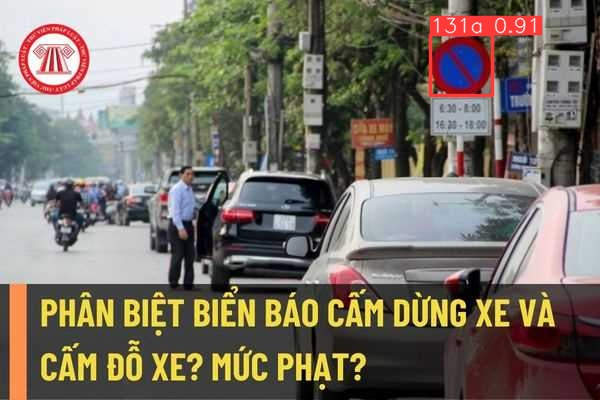

In [8]:
%cd /kaggle/working/
Image(filename='/kaggle/working/runs/detect/predict2/bien-bao-cam-dung-xe-do-xe.jpg', width=640)